 1.First, load the data, from the supplied data file

In [2]:
import pandas as pd
data = pd.read_csv("Copy of 21-06-27_LG-dati-alberi.csv")
print(data.head())

   Plot  ID Survey Date                                Species Land Use  \
0     1   1   6/21/2021  European hackberry (Celtis australis)   Forest   
1     1   2   6/21/2021  European hackberry (Celtis australis)   Forest   
2     1   3   6/21/2021  European hackberry (Celtis australis)   Forest   
3     1   4   6/21/2021            Sweet cherry (Prunus avium)   Forest   
4     1   5   6/21/2021            Sweet cherry (Prunus avium)   Forest   

   DBH 1 (cm)  DBH 1: Height (m)  DBH 1: Measured?  DBH 2 (cm)  \
0        66.8                NaN              True         NaN   
1        57.3                NaN              True         NaN   
2        63.7                NaN              True         NaN   
3         7.6                NaN              True         NaN   
4         8.9                NaN              True         NaN   

   DBH 2: Height (m)  ...  DBH 4: Measured?  DBH 5 (cm)  DBH 5: Height (m)  \
0                NaN  ...              True         NaN                NaN

2.Total number of trees

In [3]:
data.shape[0]

509

3.Figure out the distribution of DBH1, and the distribution of species

First, plot on graph of DBH1

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


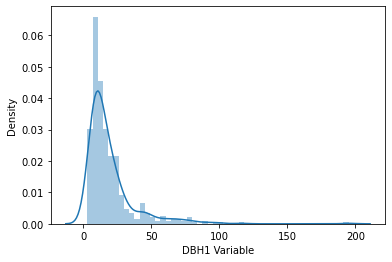

In [4]:
import seaborn as sns

DBH1 = data['DBH 1 (cm)'].values      # Get the effective value of DBH1 and store it as a list

x = pd.Series(DBH1, name='DBH1 Variable')     # save the list as an indexed array
ax = sns.distplot(x)        # drawing a distplot of DBH1
hist_fig = ax.get_figure()  # create an image
hist_fig.show() # show the data

count the trees' species

In [5]:
species = data['Species'].values      # Get the effective value of species and store it as a list

set1=set(species)        #create a set of species
print(len(set1))         #figure out the total number of species


25


Second, plot on graph of species

Black locust (Robinia pseudoacacia)            177
European hackberry (Celtis australis)          150
Black poplar (Populus nigra)                    41
Field elm (Ulmus minor)                         39
European black elderberry (Sambucus nigra)      29
Sweet cherry (Prunus avium)                     17
Tree of heaven (Ailanthus altissima)            10
Oneseed hawthorn (Crataegus monogyna)            7
White mulberry (Morus alba)                      6
Common fig (Ficus carica)                        5
Littleleaf linden (Tilia cordata)                4
Robinia spp (Robinia)                            4
Hedge maple (Acer campestre)                     3
Clammy locust (Robinia viscosa)                  3
sycamore spp (Platanus)                          3
hackberry spp (Celtis)                           2
Boxelder (Acer negundo)                          1
Oregon ash (Fraxinus latifolia)                  1
English walnut (Juglans regia)                   1
Eastern white pine (Pinus strob

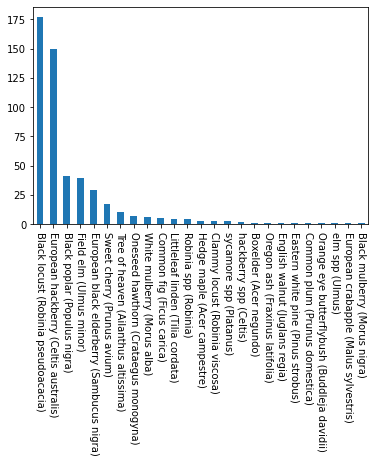

In [6]:
print(data['Species'].value_counts())

data['Species'].value_counts().plot.bar()
plt.xticks(rotation=270)
hist_fig.show()

4.figure out the connection between DBH1 and species

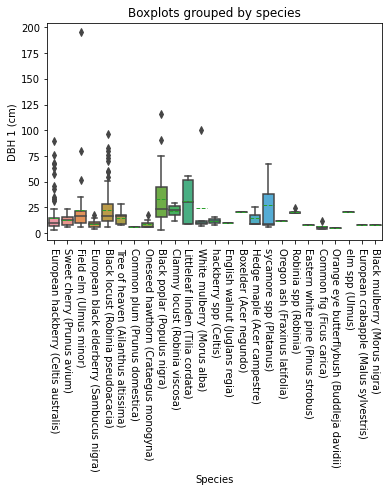

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()

sns.boxplot(x='Species', y='DBH 1 (cm)',
            data=data, orient='v', ax=axes, meanline=True, showmeans=True)      # direction is vert, show the meanline
plt.xticks(rotation=270)

axes.set_title('Boxplots grouped by species')   # Set a title
fig.show()

 Summary: 
Through the observation of the boxplot above, I found that the DBH1 of Littleleaf Linden is the largest in general, but I cannot determine which tree has the smallest DBH1. On the one hand, the minimum is very similar. On the other hand, there are some species whose quantity is very small, so it is impossible to make effective comparisons, and there are many outliers in several species

5.Relationship between total height and DBH1

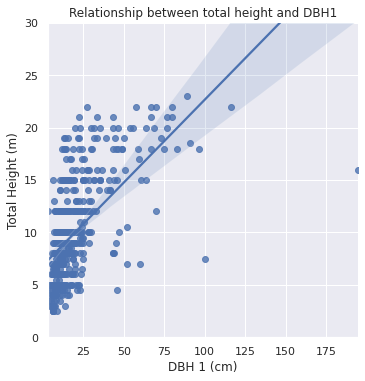

In [8]:
import numpy as np

sns.set(style='darkgrid', color_codes=True)     # set the style
sns.lmplot(x="DBH 1 (cm)", y="Total Height (m)", data=data, )    # draw a scatterplot 
plt.title('Relationship between total height and DBH1')      # set a title
plt.ylim([0,30])    # Set the ordinate range
plt.show()      


Summary：
Observing the graph, I found that the height changes faster when the DBH1 is less than 30cm, showing a steep trend. After the DBH1 is bigger than 30, the height changes slowly. This may reflect to a certain extent the growth trend of trees under local environmental conditions.
There is a very abnormal data, it may be a wrong record but it also can be a special tree, I decided not to delete it.

6.figure out the connection between DBH1 and plot, and the connection between total height and plot

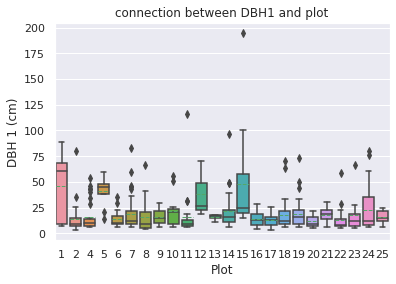

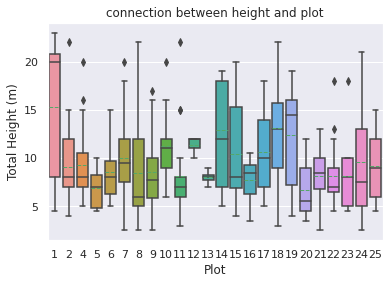

In [13]:

fig, axes = plt.subplots()

sns.boxplot(x='Plot', y='DBH 1 (cm)',
            data=data, orient='v', ax=axes, meanline=True, showmeans=True)      


axes.set_title('connection between DBH1 and plot')   
fig.show()

fig, axes = plt.subplots()

sns.boxplot(x='Plot', y='Total Height (m)',
            data=data, orient='v', ax=axes, meanline=True, showmeans=True)      


axes.set_title('connection between height and plot')   
fig.show()

Summary：
Based on the above data, I found some interesting points, for example, in plot14 and plot19 the DBH of the trees are small and very concentrated, but their heights are diversified and the overall size is relatively large.

One of our team members is responsible for handling the coordinates of plot. In assignment 3, we can explore the influence of geographical location and environment on the tree.

7.figure out the connection of six DBH

In [130]:
list6 = data1[data1.DBH6cm > 0]        # Get the effective value of those trees that have been measured six times and store it as a Dataframe
print(list6)

     Plot  ID Survey Date                                     Species  \
119     7  26   6/26/2021  European black elderberry (Sambucus nigra)   
137     8   2   6/21/2021  European black elderberry (Sambucus nigra)   
150     8  15   6/21/2021  European black elderberry (Sambucus nigra)   
152     8  17   6/21/2021  European black elderberry (Sambucus nigra)   
160     9   8   6/23/2021  European black elderberry (Sambucus nigra)   
262    15   4   6/19/2021                 White mulberry (Morus alba)   
291    16  17   6/25/2021       European hackberry (Celtis australis)   
417    21  20   6/23/2021       European hackberry (Celtis australis)   

    Land Use  DBH1cm  DBH1: Height (m)  DBH 1: Measured?  DBH2cm  \
119   Forest     8.3               NaN              True     9.6   
137   Forest     4.5               NaN              True     4.8   
150   Forest     9.9               NaN              True     3.2   
152   Forest     4.8               NaN              True     2.5   
16

In [132]:
#  Delete unnecessary information
list7 = list6.drop(columns=['Plot', 'ID','Survey Date', 'Land Use', 'DBH1: Height (m)', 'DBH 1: Measured?', 'DBH 2: Height (m)', 'DBH 2: Measured?', 'DBH 3: Height (m)', 'DBH 3: Measured?', 'DBH 4: Height (m)', 'DBH 4: Measured?', 'DBH 5: Height (m)', 'DBH 5: Measured?', 'DBH 6: Height (m)', 'DBH 6: Measured?', 'Crown: Condition', 'Total Height m', 'Comments'], inplace=False)
conn.commit()
print(list7)


                                        Species  DBH1cm  DBH2cm  DBH3cm  \
119  European black elderberry (Sambucus nigra)     8.3     9.6     8.0   
137  European black elderberry (Sambucus nigra)     4.5     4.8     7.0   
150  European black elderberry (Sambucus nigra)     9.9     3.2     3.2   
152  European black elderberry (Sambucus nigra)     4.8     2.5     2.2   
160  European black elderberry (Sambucus nigra)    13.7     4.8     4.8   
262                 White mulberry (Morus alba)   100.0   103.0    26.0   
291       European hackberry (Celtis australis)    17.5    17.5    17.5   
417       European hackberry (Celtis australis)    30.9    27.4    35.3   

     DBH4cm  DBH5cm  DBH6cm  
119     6.4     6.4     8.3  
137     7.3     4.5     6.7  
150     2.5     3.5     3.2  
152     1.6     2.5     0.9  
160     3.2     4.8     4.8  
262    49.0    29.0    44.0  
291     8.0    12.7     9.6  
417    21.3    27.1    82.1  


In [133]:
list7.insert(0, 'index', range(len(list7)), allow_duplicates=False)  #add the index
conn.commit()
print(list7)

     index                                     Species  DBH1cm  DBH2cm  \
119      0  European black elderberry (Sambucus nigra)     8.3     9.6   
137      1  European black elderberry (Sambucus nigra)     4.5     4.8   
150      2  European black elderberry (Sambucus nigra)     9.9     3.2   
152      3  European black elderberry (Sambucus nigra)     4.8     2.5   
160      4  European black elderberry (Sambucus nigra)    13.7     4.8   
262      5                 White mulberry (Morus alba)   100.0   103.0   
291      6       European hackberry (Celtis australis)    17.5    17.5   
417      7       European hackberry (Celtis australis)    30.9    27.4   

     DBH3cm  DBH4cm  DBH5cm  DBH6cm  
119     8.0     6.4     6.4     8.3  
137     7.0     7.3     4.5     6.7  
150     3.2     2.5     3.5     3.2  
152     2.2     1.6     2.5     0.9  
160     4.8     3.2     4.8     4.8  
262    26.0    49.0    29.0    44.0  
291    17.5     8.0    12.7     9.6  
417    35.3    21.3    27.1  

In [123]:
list7.shape[0]

8

Text(0, 0.5, 'DBH(cm)')

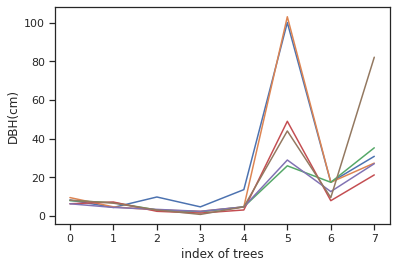

In [134]:
sns.set_theme(style="ticks")   #  plot on lineplot
sns.lineplot(
    data=list7,
    x="index", y="DBH1cm")
sns.lineplot(
    data=list7,
    x="index", y="DBH2cm")
sns.lineplot(
    data=list7,
    x="index", y="DBH3cm")
sns.lineplot(
    data=list7,
    x="index", y="DBH4cm")
sns.lineplot(
    data=list7,
    x="index", y="DBH5cm")
sns.lineplot(
    data=list7,
    x="index", y="DBH6cm")

plt.xlabel('index of trees')
plt.ylabel('DBH(cm)')

Summary：
When comparing the trees that have been measured six times, I found that there are obvious changes between the No. 5 tree and the No. 7 tree, and the measured values of the other trees have not changed much.